# Flowers and pandas: Hello World

Author: Nelson-Gon

Licence : Creative Commons


This notebook provides a simple Hello World analysis of the iris data set with special focus on harnessing the power of pandas. 

- **Loading Required Modules**

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import display
%config IPCompleter.greedy=True
%matplotlib inline

In [4]:
[x for x in dir(sns) if "data" in x]
from seaborn import load_dataset
iris = load_dataset("iris")



- **Exploring Iris with pandas**

First we try to take a look at our data set to see its structure. R users will be familiar with the `str` function. We can get something similar with a dataframe's `info` method.

In [5]:
display(iris.info())
display(iris.head(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


None

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


The above gives us a quick peek at the data set. We can decide to do a number of things but for purposes of this notebook, we shall do the following:

**TODO LIST**

- Rename columns
- Practise Grouping Operations
- Play around with reshaping
- Look for missingness
- Perform basic visualization with `pandas`, `seaborn` and/or `matplotlib`


Having setup a *TODO* list, we can proceed with our analysis.


In [6]:
# Find current column names
iris.columns
# Capitalise the first letter(for purposes of learning)
# This can be done in a number of ways: regex, string's upper method, etc
# since dir returns a list, we can use filter
regex = re.compile(r"upp.*")
list(filter(regex.match,dir(str)))



['upper']

To utilise `str`'s `upper` method as a helper function to capitalise our column names, we can use a `map`:

In [7]:
new_columns = list(map(lambda x: x[0].upper() + x[1:],iris.columns))
new_columns

['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']

The above could also have been achieved more easily by using already available methods like `capitalise` and `title`.

In [8]:
with_capitalize = list(map(lambda x: x.capitalize(),iris.columns))
with_title = list(map(lambda x: x.title(),iris.columns))
display(with_capitalize)
display(with_title)



['Sepal_length', 'Sepal_width', 'Petal_length', 'Petal_width', 'Species']

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']

There are therefore several ways to achieve the same thing. Speed, computational cost, elegance and/or convention should help one decide which of the above would best solve the problem at hand. For simplicity, I will choose any since they all achieve the same thing.


In [9]:
iris.columns = with_title
iris.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


Having finished the first task on our TODO list, we can proceed with grouping operations.

**Flowers: They come in Groups**:

In [10]:
# define a custom search function to enable easily finding a function by name.
# Find the max by group
iris.groupby("Species").describe()

Sepal_Length                                              \
                  count   mean       std  min    25%  50%  75%  max   
Species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           Sepal_Width         ... Petal_Length      Petal_Width         \
                 count   mean  ...          75%  max       count   mean   
Species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
Species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

The above gives us a few quick summary stats by group. Let's try to divide the data into `bins` using `panda`'s `cut` method. We shall also utilise `numpy`'s `where` to perform something similar to `ifelse`.

In [11]:
iris.Sepal_Length.describe()
# The above gives us a few basic stats about the data which we can use to perform binning.
# Minimum is 4.3, max is 7.9
iris.Sepal_Length=pd.cut(iris.Sepal_Length, bins = [4.0,4.5,5.0,5.5,8.0],
       labels= ["4 to 4.5", "4.5 to 5.0", "5.0 to 5.5", "5.5 to 8.0"])



In [12]:
iris.head(4)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.0 to 5.5,3.5,1.4,0.2,setosa
1,4.5 to 5.0,3.0,1.4,0.2,setosa
2,4.5 to 5.0,3.2,1.3,0.2,setosa
3,4.5 to 5.0,3.1,1.5,0.2,setosa


We can use `numpy`'s `where` to instead simply specify that anything that has "4.5 to 5.0" is ideal and anything below is not ideal(theoretical).


In [13]:
iris["Sepal_Length"] = sns.load_dataset("iris")["sepal_length"]

In [14]:
iris.Sepal_Length = np.where(iris.Sepal_Length > 4.5, "Ideal", "Non-Ideal")

**Summarise the data set to find how many values are ideal**

The following line of code groups the data by Sepal.Length and Species, thereby allowing us to have a glance at the number of theoretically ideal values by Species and other features. 

In [15]:
iris.groupby(by=["Sepal_Length", "Species"]).count()

Sepal_Width  Petal_Length  Petal_Width
Sepal_Length Species                                           
Ideal        setosa               45            45           45
             versicolor           50            50           50
             virginica            50            50           50
Non-Ideal    setosa                5             5            5

**Basic Visualization: What's hiding in those plots?**
 
 
 This section takes exploratory data analysis to the next level by providing a few basic plots to take a quick look at our data's distribution. We'll explore a few plot types:
 
 1. **scatterplots**
 
 Scatterplots are useful if you would like to see if there is some sort of relationship(correlation) between two variables x and y. In this case, we might want to see if there exists a relationship between say sepal length and sepal_width. In this case, we could plot this and visually(without applying any statistical tests) see if there is any sort of visible relationship [some old ref](https://mste.illinois.edu/courses/ci330ms/youtsey/scatterinfo.html). Let's take a look at how we could do this first. 
 
 

Text(0.5, 1.0, 'A less informative scatterplot')

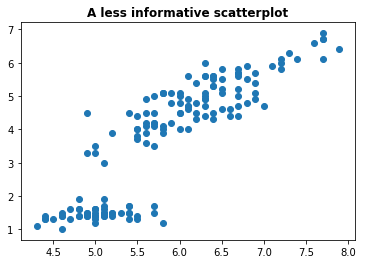

In [101]:
# start from scratch
iris_df = sns.load_dataset("iris")
iris_df.columns = with_capitalize
iris_df.head()
# using plt's scatter
# get help
#plt.legend?
#?plt.title
#?plt.axes

plt.figure()
plt.scatter(x="Sepal_length", y="Petal_length", data=iris_df)
plt.title("A less informative scatterplot", fontdict = {'fontsize': 12, 'fontweight': 'bold'},
           loc = "center")


The above plot provides a less informative look at the data. There are a few problems but perhaps the most obvious is the lack of the ability to distinguish between various categories by group. There are a few ways to achieve this:

1. **Grouped pandas plot**



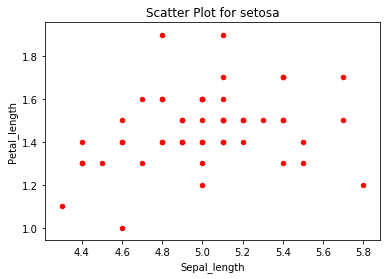

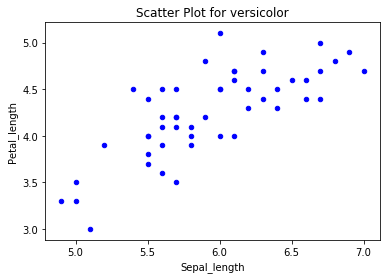

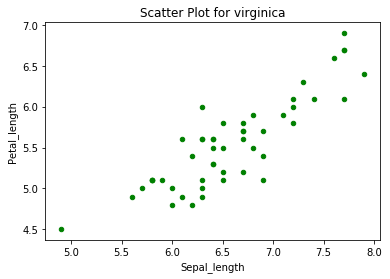

In [77]:
grouped_iris = iris_df.groupby("Species")
#grouped_iris.get_group("setosa").plot.scatter(x="Sepal_length", y="Petal_length", color="red")
# Use the above as a hack to plot these by group
grouping_colors = ["red", "blue", "green"]
for key, col in zip(grouped_iris.groups, grouping_colors):
    grouped_iris.get_group(key).plot.scatter(x="Sepal_length", y= "Petal_length", color =col)
    plt.title("Scatter Plot for " + key)




The above while still not the best visualization in that it provides three rather than a single plot does at least reveal something important about the data: 
**The nature of the relationship between petal length and sepal length varies by species**(I know, Captain Obvious!). For instance, while there is no visible linear relationship for setosa, virginica does show a pretty linear relationship(some might call it correlation). 

To make, the above plot more informative, we could visualize it as a single plot. `Seaborn` does have a method that also provides a linear plot with the standard error(akin to `ggplot2`'s `geom_smooth(method="lm")`. Let's see what that looks like

2. **Seaborn Regression Plot**

Text(0.5, 1.0, 'Linear Regression with seaborn')

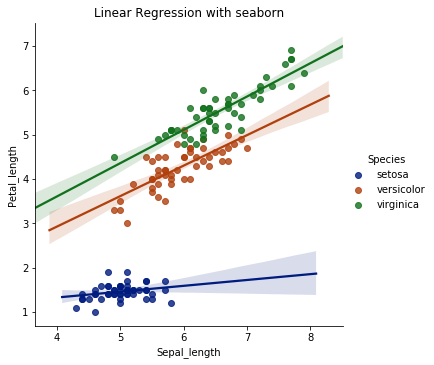

In [100]:
# palettes similar to R's palettes
sns.lmplot(x="Sepal_length", y= "Petal_length", hue="Species", data = iris_df, palette="dark",
          height= 5)
plt.title("Linear Regression with seaborn",fontdict = {'fontsize' : 12})
# Can't quite figure out how to remove the se just yet. 
# will return to that.


From the above plot, one can easily see that like the previous graphs showed, virginica has a more direct linear relationship as compared to either versicolor or setosa. Let's see if the statistics agree.

**Linear Least squares regression**

SciPy's [stats](https://docs.scipy.org/doc/scipy/reference/stats.html) has a fairly robust `linregress` method that can allow us to fit a [linear least squares](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm) model. 

In [118]:
# Use linregress from scipy
from scipy.stats import linregress
#?linregress
# from the docs this performs a linear -least squares regression
# Filter Species only for setosa
setosa_only = iris_df[iris_df.Species == "setosa"]
lin_mod = linregress(setosa_only["Sepal_length"], setosa_only["Petal_length"])
lin_mod.rvalue


0.26717575886875716

As seen from the **R<sup>2</sup>**, only ~26.7% of the variance can be explained by the model for the setosa species. What about for the virginica species?

In [125]:
def filter_and_fit(df,species):
    """Return the Rsquared given an iris dataset.
    Keyword arguments:
    df      -- An iris data set
    species -- The species with which to filter.
      """
    use_df = df[df.Species==species]
   
    return linregress(use_df["Sepal_length"], use_df["Petal_length"]).rvalue
    

filter_and_fit(iris_df,"virginica")
    

0.8642247329355764

The above R<sup>2</sup> does agree with a visual inspection of the plots and the resul
t of the `seaborn` plot. 

In [133]:
# Just some fancy tests to see that the docstring actually works.
#print(repr(filter_and_fit.__doc__))
#?filter_and_fit